In [1]:
%matplotlib inline
import numpy as np
from numpy.random import randn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold,  cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Problem 1: Testing ability of linear SVC and RF

In [2]:
///
From a provided data csv file, test the abiliyt of a linear SVC and random-forest classified to predict red-wine quality using 5-fold cross validation
///


#load data file
df = pd.read_csv('winequality-red.csv',sep = ';')

X = df[['fixed acidity', 
        'volatile acidity',
        'citric acid',
        'residual sugar',
        'chlorides',
        'free sulfur dioxide', 
        'total sulfur dioxide', 
        'density',
        'pH',
        'sulphates',
        'alcohol']].values


y = df['quality'].values


#test the data using kfold


svc = SVC(kernel='linear')
RF = RandomForestClassifier(n_estimators=1000)

kf = KFold(n_splits=5)


classlist = [svc,RF]
nameclasslist = ['SVC','RF']

for i,j in zip(classlist,nameclasslist):
    print("%s scores" %j)
    scores = cross_val_score(i, X, y, cv=kf)
    print(scores)
    print("Average %s score: %.3f" %(j,np.average(scores)))
    print()




SVC scores
[0.584375   0.53125    0.55625    0.540625   0.63322884]
Average SVC score: 0.569

RF scores
[0.603125   0.534375   0.56875    0.571875   0.59874608]
Average RF score: 0.575



# Problem 1: Plotting PCA2 vs PCA1 with respect to quality 

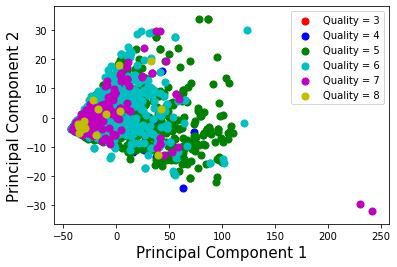

In [3]:
///
From the first part of problem 1, it is noticed that both predictions yield about 50% effectiveness. part of the problem is that there is not much separation in the data
plot the data to illustrate this point
///

df = pd.read_csv('winequality-red.csv',sep = ';')

#separate the data

features = ['fixed acidity', 
        'volatile acidity',
        'citric acid',
        'residual sugar',
        'chlorides',
        'free sulfur dioxide', 
        'total sulfur dioxide', 
        'density',
        'pH',
        'sulphates',
        'alcohol']

# Separating out the features
x = df.loc[:, features].values
# Separating out the quality 
y = df.loc[:,['quality']].values


#make PCA 1 and 2
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

#add in the quality column
finalDf = pd.concat([principalDf, df[['quality']]], axis = 1)


#plot PCA2 vs PCA1

plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)

qualities = [3,4,5,6,7,8]
colors = ['r', 'b', 'g','c','m','y']
for quality, color in zip(qualities,colors):
    indicesToKeep = finalDf['quality'] == quality
    plt.scatter(finalDf.loc[indicesToKeep, 'principal component 1'], finalDf.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(['Quality = %i' %i for i in qualities])
plt.show()


# Problem 1: Define good wine as wine with a quality of 6 or higher

In [4]:
///
to gain a better ability to predict what is good wine, define the difference between good wine and "not so good" wine. good wine has a quality score of 6 or higher
///
#load data file
df = pd.read_csv('winequality-red.csv',sep = ';')

#add new column called "good wine" with inputs as 1 for a quality with 6 or higher and 0 as the rest
new_col = []
for i in df['quality'].values:
    if i >= 6:
        new_col.append(1)
    else:
        new_col.append(0)
        
df.insert(loc = 12, column = 'good wine', value = new_col)


X = df[['fixed acidity', 
        'volatile acidity',
        'citric acid',
        'residual sugar',
        'chlorides',
        'free sulfur dioxide', 
        'total sulfur dioxide', 
        'density',
        'pH',
        'sulphates',
        'alcohol',
       'good wine']].values


y = df['quality'].values


#test the data using kfold


svc = SVC(kernel='linear')
RF = RandomForestClassifier(n_estimators=1000)

kf = KFold(n_splits=5)


classlist = [svc,RF]
nameclasslist = ['SVC','RF']

for i,j in zip(classlist,nameclasslist):
    print("%s scores" %j)
    scores = cross_val_score(i, X, y, cv=kf)
    print(scores)
    print("Average %s score: %.3f" %(j,np.average(scores)))
    print()



SVC scores
[0.878125   0.8125     0.80625    0.753125   0.87460815]
Average SVC score: 0.825

RF scores
[0.88125    0.821875   0.83125    0.775      0.87774295]
Average RF score: 0.837



# Problem 2: Making PCA plot

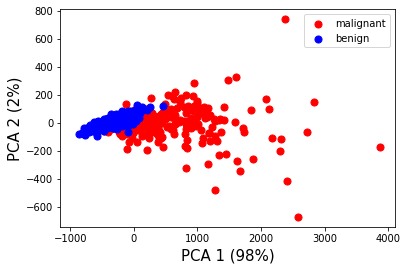

In [5]:
///
classification problem of determining if a tumor is benign or malignant
first evaluate the data using principal component analysis
///

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

X = data.data
y = data.target


#make PCA 1 and 2
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
pcavar = pca.fit(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PCA1', 'PCA2'])


#make column that says "benign" or "malignant"
tumorcolumn = []
for i in range(len(y)):
    if y[i] == 0:
        tumorcolumn.append('malignant')
    elif y[i] == 1:
        tumorcolumn.append('benign')



#add in the tumor column column
finalDf = pd.concat([principalDf, pd.DataFrame(tumorcolumn)], axis = 1)
finalDf = finalDf.rename(columns = {0:'tumor'})


#plot PCA2 vs PCA1
var = pcavar.explained_variance_ratio_


plt.xlabel('PCA 1 (%.0f%%)' %(var[0]*100), fontsize = 15)
plt.ylabel('PCA 2 (%.0f%%)'%(var[1]*100), fontsize = 15)

tumors = ['malignant','benign']
colors = ['r','b']

for tumor, color in zip(tumors,colors):
    indicesToKeep = finalDf['tumor'] == tumor
    plt.scatter(finalDf.loc[indicesToKeep, 'PCA1'], finalDf.loc[indicesToKeep, 'PCA2'], c = color, s = 50)

plt.legend(['%s' %i for i in tumors])

plt.show()

    

# Problem 2: Comparing classifiers 

In [6]:
///
now compare the linear SVC, random forests and logistic regression for classifying the tumors using 5 fold cross validation
///

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()


X = data.data
y = data.target


LR = LogisticRegression(solver='lbfgs',multi_class='multinomial', max_iter = 5000)
RF = RandomForestClassifier(n_estimators=1000)
svc = SVC(kernel='linear')

kf = KFold(n_splits=5, shuffle = True)


classlist = [svc,RF,LR]
nameclasslist = ['SVC','RF','LR']


#first compare the classifiers with the original data set
print('Classifier score using original data')
for i,j in zip(classlist,nameclasslist):
    print("%s scores" %j)
    scores = cross_val_score(i, X, y, cv=kf)
    print(scores)
    print("Average %s score: %.3f" %(j,np.average(scores)))
    print()
    

#now use the PCA1 and PCA2 data
print('------------------------------------------')
print('Classifier score using PCA data')
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PCA1', 'PCA2'])

#make column that says "benign" or "malignant"
tumorcolumn = []
for i in range(len(y)):
    if y[i] == 0:
        tumorcolumn.append('malignant')
    elif y[i] == 1:
        tumorcolumn.append('benign')

        
#add in the tumor column column
finalDf = pd.concat([principalDf, pd.DataFrame(tumorcolumn)], axis = 1)
finalDf = finalDf.rename(columns = {0:'tumor'})

pcax = finalDf[['PCA1', 'PCA2']].values
pcay = finalDf['tumor'].values


for i,j in zip(classlist,nameclasslist):
    print("%s scores" %j)
    scores = cross_val_score(i, pcax, pcay, cv=kf)
    print(scores)
    print("Average %s score: %.3f" %(j,np.average(scores)))
    print()

Classifier score using original data
SVC scores
[0.92982456 0.96491228 0.97368421 0.93859649 0.97345133]
Average SVC score: 0.956

RF scores
[0.96491228 0.99122807 0.94736842 0.93859649 0.99115044]
Average RF score: 0.967

LR scores
[0.96491228 0.96491228 0.94736842 0.92982456 0.96460177]
Average LR score: 0.954

------------------------------------------
Classifier score using PCA data
SVC scores
[0.92105263 0.95614035 0.94736842 0.9122807  0.91150442]
Average SVC score: 0.930

RF scores
[0.9122807  0.94736842 0.89473684 0.99122807 0.90265487]
Average RF score: 0.930

LR scores
[0.92982456 0.9122807  0.9122807  0.93859649 0.92920354]
Average LR score: 0.924



# Problem 3

In [7]:
///
predict the abe of abolones based on a number of physical measurements from the file abalone.names and abalone.data
age is determined by the number of rings in the abalone shell (treat as a classification problem)
///

#part a
#upload the data frame and add columns for the data
df = pd.read_csv('abalone.data',sep = ',', names = ['sex',
                                                    'length',
                                                    'diameter',
                                                    'height',
                                                    'whole wt', 
                                                    'shucked wt',
                                                    'viscera wt',
                                                    'shell wt',
                                                    'rings']) 

#change M, F, I in sex to 0, 1, and 2 respectivley 
df = df.replace({'sex' : { 'M' : 0, 'F' : 1, 'I' : 2 }})



#part b
#predict number of rings based on physical characteristics
#Evaluate effectiveness of SVC and RF classifiers
svc = SVC(kernel='linear')
RF = RandomForestClassifier(n_estimators=1000)

kf = KFold(n_splits=5, shuffle = True)

shellx = df[['sex',
        'length',
        'diameter',
        'height',
        'whole wt', 
        'shucked wt',
        'viscera wt',
        'shell wt']].values 

shelly = df['rings'].values

classlist = [svc,RF]
nameclasslist = ['SVC','RF']
avglist = []


print('Classifier score without grouping')
for i,j in zip(classlist,nameclasslist):
    print("%s scores" %j)
    scores = cross_val_score(i, shellx, shelly, cv=kf)
    print(scores)
    print("Average %s score: %.3f" %(j,np.average(scores)))
    avglist.append(np.average(scores))
    print()

    
    
#part c
#make a new column called 'group' which will be group 1 for 1<rings<=8, 2 for 9 and 10, and 3 for 10 or greater

def conditions(s):
    if s['rings'] <= 8:
        return 1
    elif s['rings'] == 9 or s['rings'] == 10:
        return 2
    elif s['rings'] > 10:
        return 3
    
df['group'] = df.apply(conditions, axis = 1)

shellx_new = df[['sex',
        'length',
        'diameter',
        'height',
        'whole wt', 
        'shucked wt',
        'viscera wt',
        'shell wt',
        'group']].values

print('-----------------------------')
print('Classifier score with grouping rings')
for i,j in zip(classlist,nameclasslist):
    print("%s scores" %j)
    scores = cross_val_score(i, shellx_new, shelly, cv=kf)
    print(scores)
    print("Average %s score: %.3f" %(j,np.average(scores)))
    avglist.append(np.average(scores))
    print()
print('-----------------------------')
print()
print('Sum of percentages from grouping and not grouping')
print('SVC w/o grouping + SVC with grouping = %.2f' %(avglist[0] + avglist[2]))
print('RF w/o grouping + RF with grouping = %.2f' %(avglist[1] + avglist[3]))
    
#part d
print()
print('----------------------------------------')   
print('Classifier score by grouping infants')

def infants(s):
    if s['sex'] == 2:
        return 1
    else:
        return 0
df['infant?'] = df.apply(infants, axis = 1)

infantx = df[['infant?']].values

for i,j in zip(classlist,nameclasslist):
    print("%s scores" %j)
    scores = cross_val_score(i, infantx, shelly, cv=kf)
    print(scores)
    print("Average %s score: %.3f" %(j,np.average(scores)))
    print()

Classifier score without grouping
SVC scores
[0.26196172 0.25837321 0.25628743 0.26107784 0.21796407]
Average SVC score: 0.251

RF scores
[0.26913876 0.23086124 0.25269461 0.23113772 0.25748503]
Average RF score: 0.248

-----------------------------
Classifier score with grouping rings
SVC scores
[0.44856459 0.49880383 0.48023952 0.4742515  0.48742515]
Average SVC score: 0.478

RF scores
[0.465311   0.4437799  0.46826347 0.46347305 0.45748503]
Average RF score: 0.460

-----------------------------

Sum of percentages from grouping and not grouping
SVC w/o grouping + SVC with grouping = 0.73
RF w/o grouping + RF with grouping = 0.71

----------------------------------------
Classifier score by grouping infants
SVC scores
[0.19497608 0.1854067  0.16646707 0.19760479 0.1748503 ]
Average SVC score: 0.184

RF scores
[0.21052632 0.19617225 0.18323353 0.18203593 0.20479042]
Average RF score: 0.195

